In [34]:
import numpy as np
import embedded_voting as ev
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib
import tikzplotlib
matplotlib.rcParams.update({'font.size':17})

In [35]:
colors = {"EV":"#de302a", "AV-Prod":"#32e62c","AV":"#32e62c", "AV-Sum":"#45ba41", "AV-Rand":"#6ab068",
         "RV":"#dee046", "ML":"#2488ed", "ML+":"#4540cf", "EV+":"#a83d3d","Rand":"#707070",
          "GA":"#707070", "Bad GA":"#404040", "Single":"#707070", "Bad ML+":"#4540cf", "Bad EV+":"#a83d3d"}

# Base Case

In [36]:
res = np.loadtxt("results_base_case_normal_b.csv", dtype=float,delimiter=",")
# res_groupaware = np.loadtxt("results_base_case_groupaware.csv", dtype=float,delimiter=",")
# res2 = np.loadtxt("results_expe_base_badly_0921.csv", dtype=float,delimiter=",")
n_agg = 8
algos_res = res[:n_agg+2].mean(1)
best_algo = res[n_agg+2:].mean(1).max()
# algos_res[9] = res_groupaware.mean()
algos_res = np.concatenate([algos_res, [best_algo]])
algos_name = ["EV", "AV-Prod", "AV-Sum", "AV-Rand", "RV", "ML", "ML+", "EV+", "Rand", "GA", "Single", "Bad ML+", "Bad EV+"]

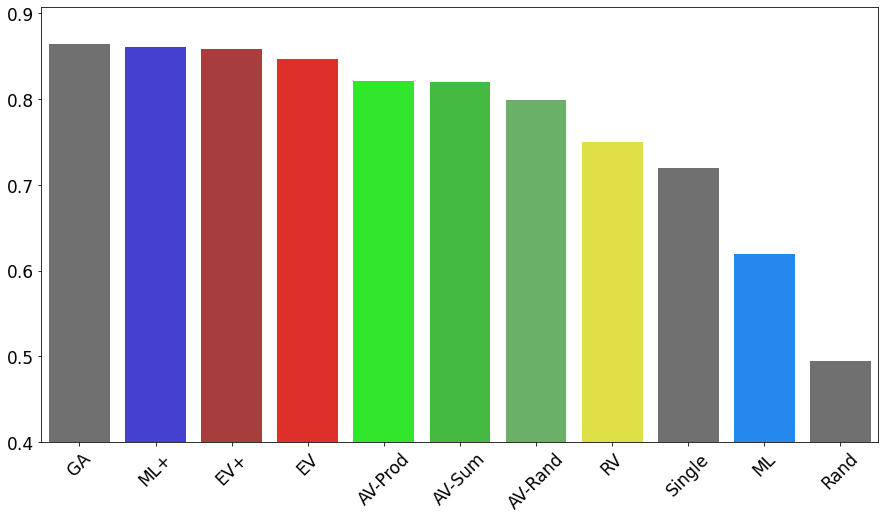

In [37]:
order = algos_res.argsort()[::-1]
plt.figure(figsize=(15,8))
for i in range(len(order)):
    plt.bar(i, algos_res[order[i]],color=colors[algos_name[order[i]]])
    
plt.xticks(range(len(order)), [algos_name[i] for i in order], rotation=45)
plt.xlim(-0.5,len(order)-0.5)
plt.ylim(0.4)
tikzplotlib.save("basecase_normal.tex")
plt.show()

# Groupe homogéne

In [39]:
order_next = [5,4,0,1,2,3]
algos_name = ["EV", "AV", "RV", "ML", "ML+", "EV+", "GA", "Single"]

list_size = [1] + list(np.arange(2,31,2))
results_size = np.loadtxt("results_expe_1_normal.csv", delimiter=",")
# results_size_2 = np.loadtxt("results_expe_1_bounds.csv", delimiter=",")
# results_size = np.concatenate([results_size, results_size_2])

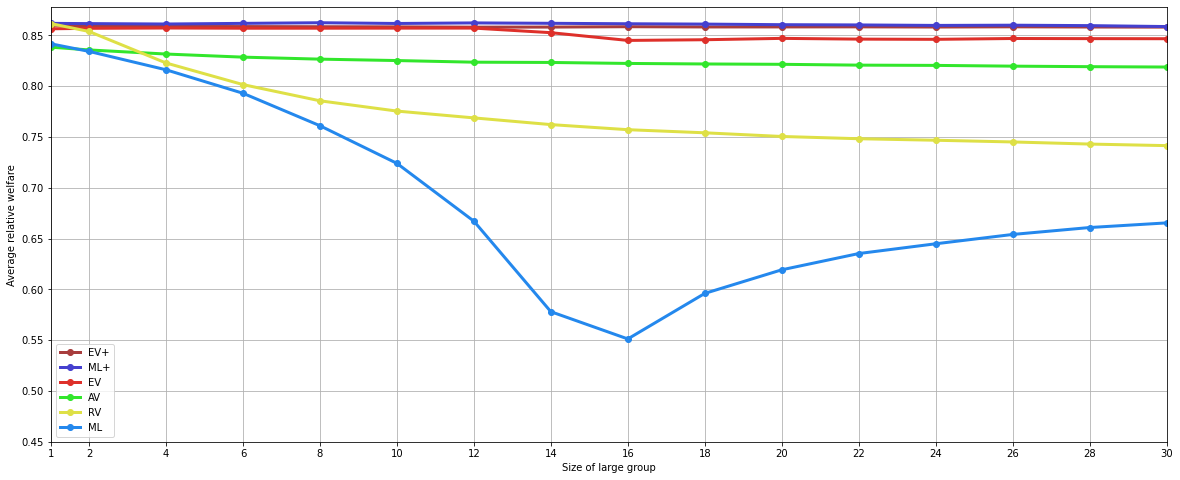

In [18]:

_ = plt.figure(figsize=(20, 8))
for i in range(len(results_size)):
    plt.plot(list_size, 
             results_size[order_next[i]], 
             'o-', 
             label=algos_name[order_next[i]],
             color=colors[algos_name[order_next[i]]], 
             linewidth=3)

plt.ylim(0.45)
plt.xlim(1,30)
plt.xlabel("Size of large group")
plt.ylabel("Average relative welfare")
plt.xticks(list_size, list_size)
# plt.title("Evolution of the welfare with number of candidates")
plt.legend()
plt.grid(0.3)
tikzplotlib.save("exp1_normal.tex")
plt.show()

# Nombre de groupes

In [19]:
list_number = [0,1] + list(np.arange(2,21,2))
results_number = np.loadtxt("results_expe_2_normal.csv", delimiter=",")
# results_number_2 = np.loadtxt("results_expe_2_bounds.csv", delimiter=",")
# results_number = np.concatenate([results_number, results_number_2])

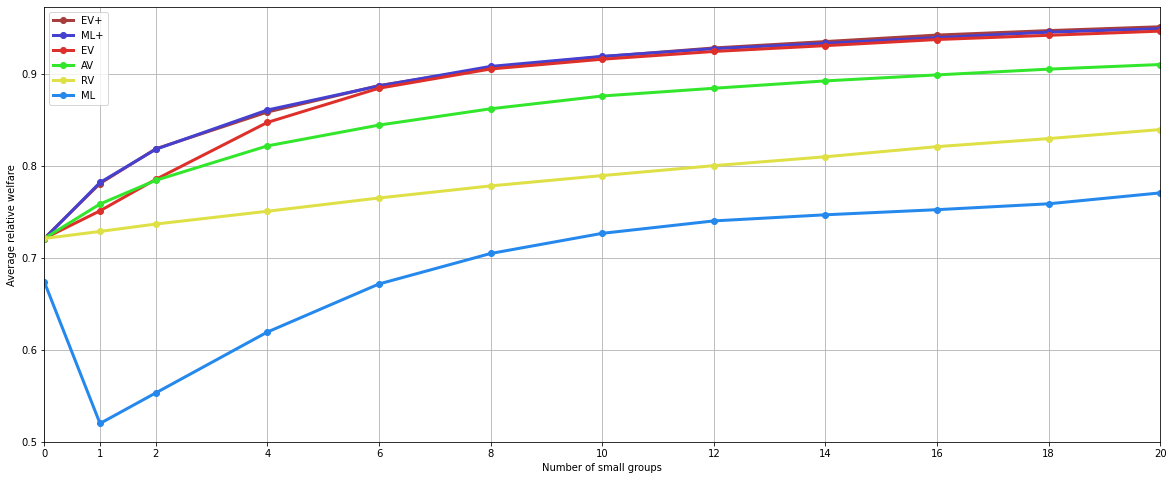

In [21]:

_ = plt.figure(figsize=(20, 8))
for i in range(len(results_number)):
    plt.plot(list_number, 
             results_number[order_next[i]], 
             'o-', 
             label=algos_name[order_next[i]],
             color=colors[algos_name[order_next[i]]], 
             linewidth=3)

plt.ylim(0.5)
plt.xlim(0,20)
plt.xlabel("Number of small groups")
plt.ylabel("Average relative welfare")
plt.xticks(list_number, list_number)
# plt.title("Evolution of the welfare with number of candidates")
plt.legend()
plt.grid(0.3)
tikzplotlib.save("exp2_normal.tex")
plt.show()

# Nombre de candidats

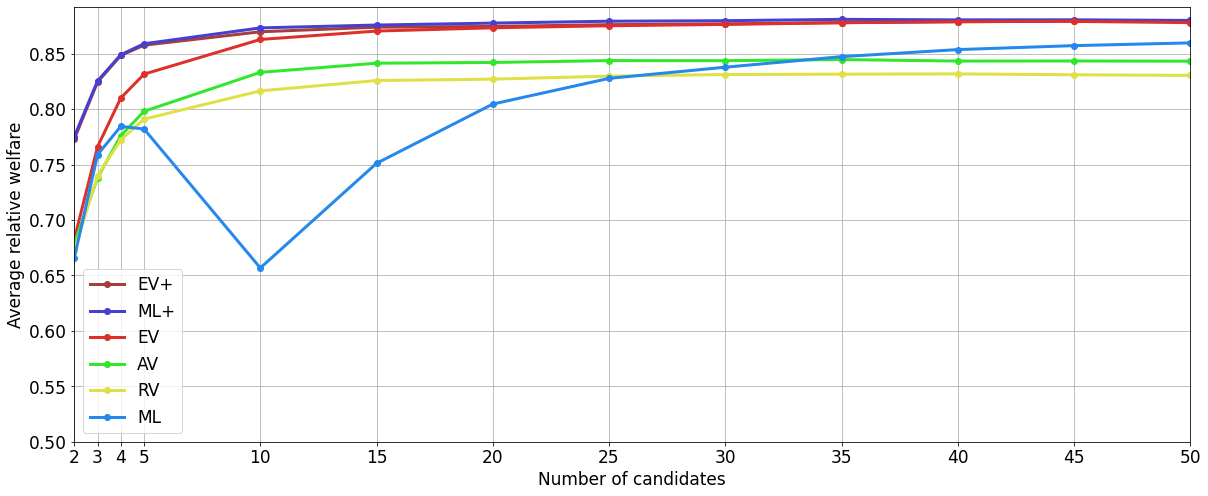

In [40]:
list_candidates = [2,3,4] + list(np.arange(5,51,5))
results_cand = np.loadtxt("results_expe_3_small3.csv", delimiter=",")
# results_cand_2 = np.loadtxt("results_expe_3_bounds.csv", delimiter=",")
# results_cand = np.concatenate([results_cand, results_cand_2])

_ = plt.figure(figsize=(20, 8))
for i in range(len(results_cand)):
    plt.plot(list_candidates, 
             results_cand[order_next[i]], 
             'o-', 
             label=algos_name[order_next[i]],
             color=colors[algos_name[order_next[i]]], 
             linewidth=3)

plt.ylim(0.5)
plt.xlim(2,50)
plt.xlabel("Number of candidates")
plt.ylabel("Average relative welfare")
plt.xticks(list_candidates, list_candidates)
# plt.title("Evolution of the welfare with number of candidates")
plt.legend()
plt.grid(0.3)
# tikzplotlib.save("exp3_normal.tex")
plt.show()

# Training set

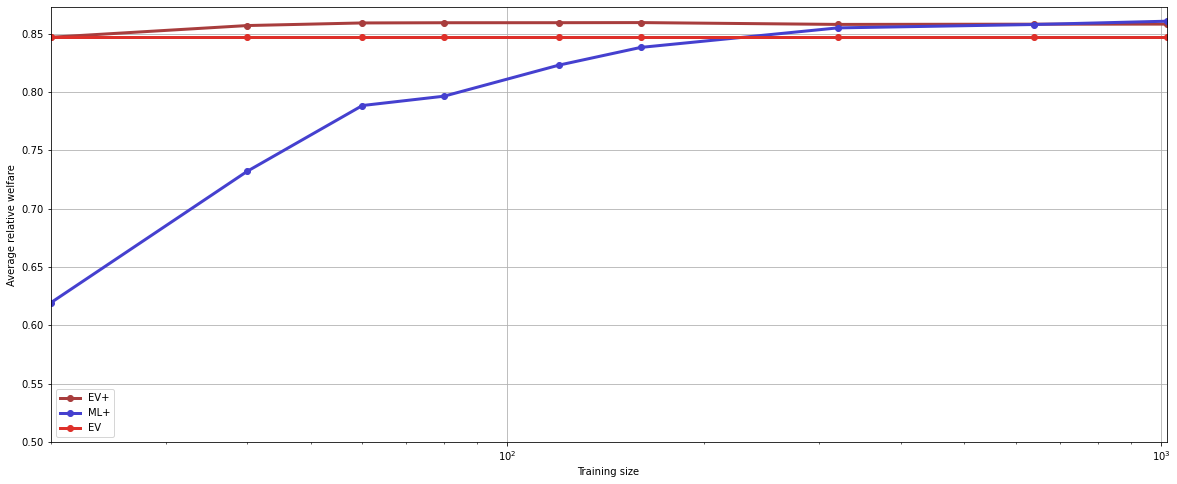

In [11]:

list_train = np.array([0,20,40,60,100,140,300,620,1000])+20
results_train = np.loadtxt("results_expe_4_normal.csv", delimiter=",")
# res = np.loadtxt("results_base_case_0921.csv", dtype=float,delimiter=",")
results_train = np.concatenate([results_train, [[res[0].mean()]*len(list_train)]])
order_next = [1,0,2,3]
algos_name = ["ML+", "EV+", "EV", "ML"]
_ = plt.figure(figsize=(20, 8))
for i in range(len(results_train)):
    plt.plot(list_train, 
             results_train[order_next[i]], 
             'o-', 
             label=algos_name[order_next[i]],
             color=colors[algos_name[order_next[i]]], 
             linewidth=3)

plt.ylim(0.5)
plt.xlim(20,1020)
plt.xticks(list_train, list_train)
plt.xscale("log")
plt.xlabel("Training size")
plt.ylabel("Average relative welfare")
# plt.title("Evolution of the welfare with number of candidates")
plt.legend()
plt.grid(0.3)
tikzplotlib.save("exp4_normal.tex")
plt.show()

# Group noise

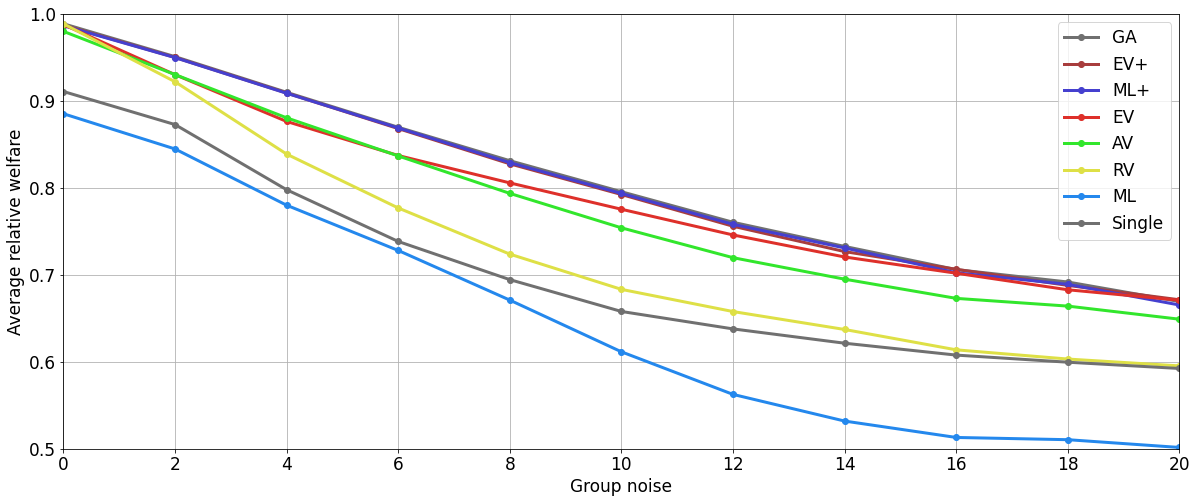

In [16]:
list_gnoises = list(np.arange(0,21,2))
order_next = [6,5,4,0,1,2,3,7]
algos_name = ["EV", "AV", "RV", "ML", "ML+", "EV+", "GA", "Single"]
results_gnoises = np.loadtxt("results_expe_5_0921.csv", delimiter=",")
results_gnoises_2 = np.loadtxt("results_expe_5_bounds.csv", delimiter=",")
results_gnoises = np.concatenate([results_gnoises, results_gnoises_2])

_ = plt.figure(figsize=(20, 8))
for i in range(len(results_gnoises)):
    plt.plot(list_gnoises, 
             results_gnoises[order_next[i]], 
             'o-', 
             label=algos_name[order_next[i]],
             color=colors[algos_name[order_next[i]]], 
             linewidth=3)

plt.ylim(0.5, 1)
plt.xlim(0,20)
plt.xlabel("Group noise")
plt.ylabel("Average relative welfare")
# plt.title("Evolution of the welfare with number of candidates")
plt.legend()
plt.grid(0.3)
plt.xticks(list_gnoises, list_gnoises)
tikzplotlib.save("exp5.tex")
plt.show()

# Independent noise

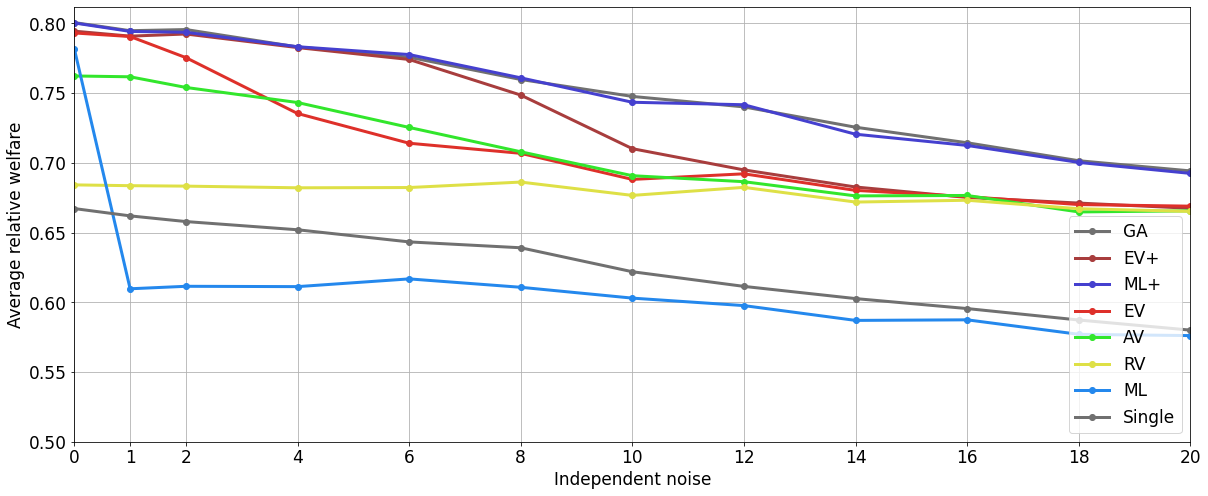

In [17]:
list_inoises = [0,1] + list(np.arange(2,21,2))
results_inoises = np.loadtxt("results_expe_6_0921.csv", delimiter=",")
results_inoises_2 = np.loadtxt("results_expe_6_bounds.csv", delimiter=",")
results_inoises = np.concatenate([results_inoises, results_inoises_2])

_ = plt.figure(figsize=(20, 8))
for i in range(len(results_inoises)):
    plt.plot(list_inoises, 
             results_inoises[order_next[i]], 
             'o-', 
             label=algos_name[order_next[i]],
             color=colors[algos_name[order_next[i]]], 
             linewidth=3)

plt.ylim(0.5)
plt.xlim(0,20)
plt.xlabel("Independent noise")
plt.ylabel("Average relative welfare")
# plt.title("Evolution of the welfare with number of candidates")
plt.legend()
plt.grid(0.3)
plt.xticks(list_inoises, list_inoises)
tikzplotlib.save("exp6.tex")
plt.show()

# Group noise function

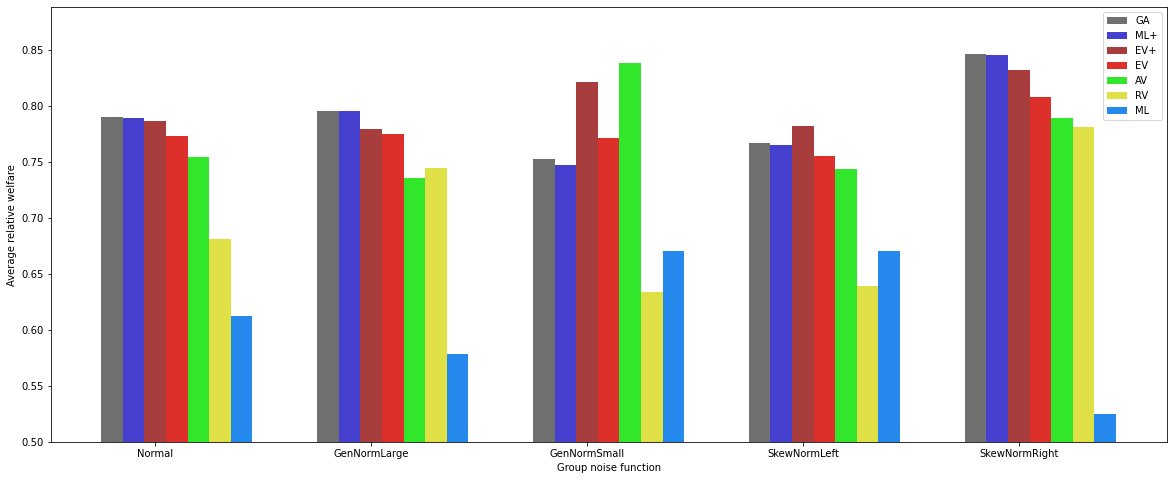

In [4]:
results_gnoisesf = np.loadtxt("results_expe_7_1028.csv", delimiter=",")
# print(results_gnoisesf)
algos_name = ["GA","EV", "AV", "RV", "ML", "ML+", "EV+"]

order_next = [0,5,6,1,2,3,4]
list_gnoises = ["Normal", "GenNormLarge", "GenNormSmall", "SkewNormLeft", "SkewNormRight"]
_ = plt.figure(figsize=(20, 8))
for i in range(len(results_gnoisesf)):
    plt.bar(np.arange(len(results_gnoisesf.T))+i*0.1, 
             results_gnoisesf[order_next[i]], 
             label=algos_name[order_next[i]],
             width=0.1,
             color=colors[algos_name[order_next[i]]])

plt.xticks(np.arange(len(results_gnoisesf.T))+0.2, list_gnoises)
plt.ylim(0.5)
#plt.xlim(0,20)
plt.xlabel("Group noise function")
plt.ylabel("Average relative welfare")
# plt.title("Evolution of the welfare with number of candidates")
plt.legend()
#plt.grid(0.3)
tikzplotlib.save("exp7_2.tex")
plt.show()

# Independent noise function

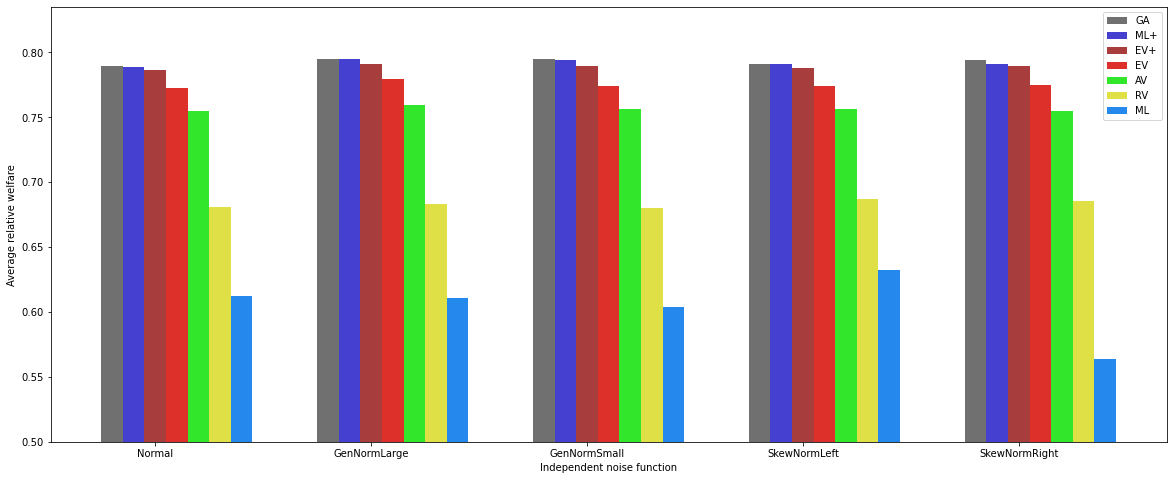

In [15]:

algos_name = ["GA","EV", "AV", "RV", "ML", "ML+", "EV+"]

order_next = [0,5,6,1,2,3,4]

results_gnoisesf = np.loadtxt("results_expe_8_1024.csv", delimiter=",")
list_gnoises = ["Normal", "GenNormLarge", "GenNormSmall", "SkewNormLeft", "SkewNormRight"]
_ = plt.figure(figsize=(20, 8))
for i in range(len(results_gnoisesf)):
    plt.bar(np.arange(len(results_gnoisesf.T))+i*0.1, 
             results_gnoisesf[order_next[i]], 
             label=algos_name[order_next[i]],
             width=0.1,
             color=colors[algos_name[order_next[i]]])

plt.xticks(np.arange(len(results_gnoisesf.T))+0.2, list_gnoises)
plt.ylim(0.5)
#plt.xlim(0,20)
plt.xlabel("Independent noise function")
plt.ylabel("Average relative welfare")
# plt.title("Evolution of the welfare with number of candidates")
plt.legend()
#plt.grid(0.3)
tikzplotlib.save("exp8.tex")
plt.show()

# Cross-Correlation 1

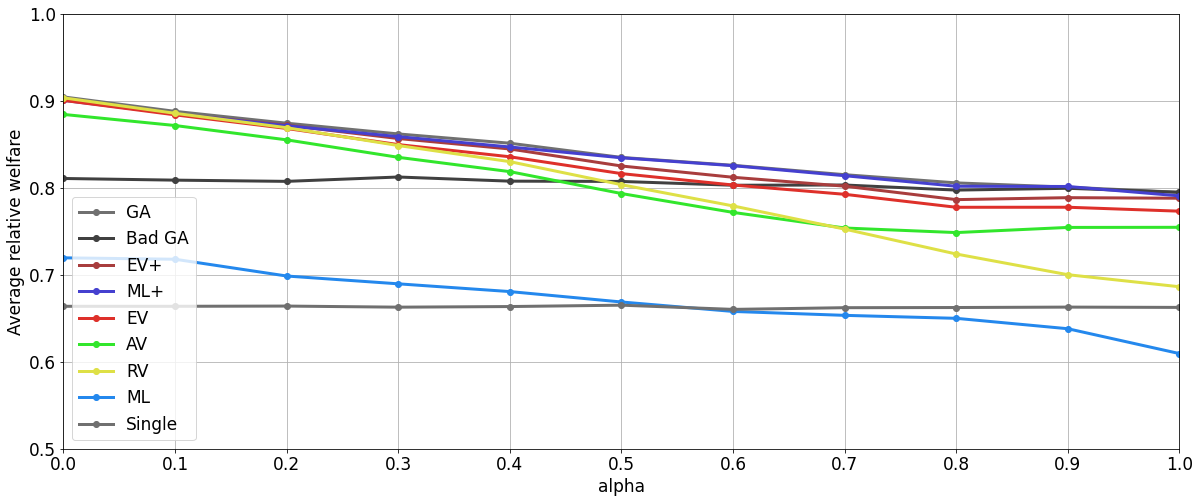

In [28]:
list_alpha = [np.round(0.1*i,1) for i in range(11)]
order_next = [7,6,5,4,0,1,2,3,8]
algos_name = ["EV", "AV", "RV", "ML", "ML+", "EV+", "Bad GA", "GA", "Single"]
results_alpha = np.loadtxt("results_expe_10_0921.csv", delimiter=",")[::,:11]
results_alpha_2 = np.loadtxt("results_expe_10_bounds.csv", delimiter=",")[::,:11]
results_alpha = np.concatenate([results_alpha, results_alpha_2])

_ = plt.figure(figsize=(20, 8))
for i in range(len(results_alpha)):
    plt.plot(list_alpha, 
             results_alpha[order_next[i]], 
             'o-', 
             label=algos_name[order_next[i]],
             color=colors[algos_name[order_next[i]]], 
             linewidth=3)

plt.ylim(0.5, 1)
plt.xlim(0,1)
plt.xlabel("alpha")
plt.ylabel("Average relative welfare")
# plt.title("Evolution of the welfare with number of candidates")
plt.legend()
plt.grid(0.3)
plt.xticks(list_alpha, list_alpha)
tikzplotlib.save("exp10.tex")
plt.show()

# Cross-Correlation 2

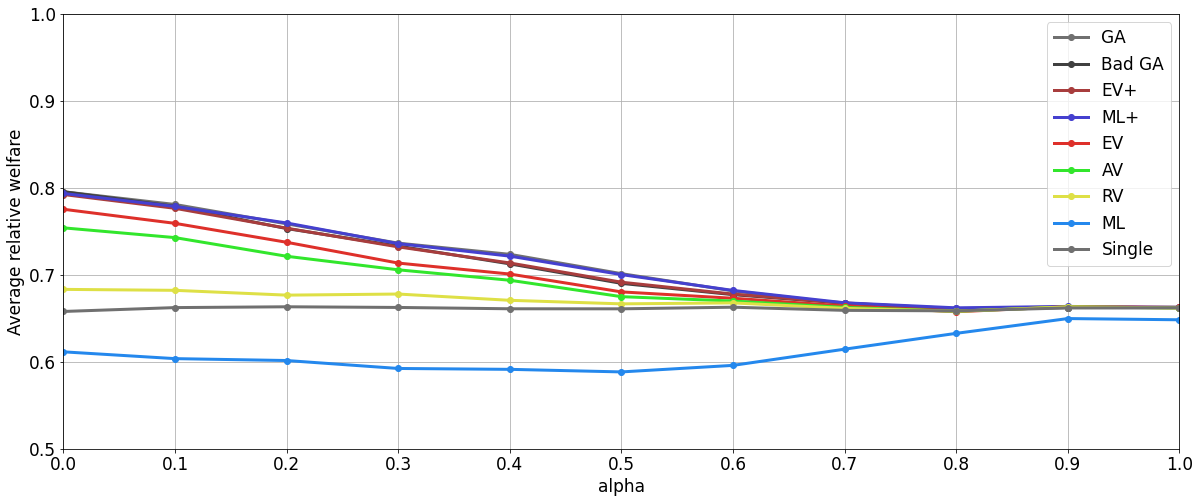

In [31]:
list_alpha = [np.round(0.1*i,1) for i in range(11)]
results_alpha = np.loadtxt("results_expe_11_0921.csv", delimiter=",")
results_alpha_2 = np.loadtxt("results_expe_11_bounds.csv", delimiter=",")
results_alpha = np.concatenate([results_alpha, results_alpha_2])
#results_gnoises_2 = np.loadtxt("results_expe_5_bounds.csv", delimiter=",")
#results_gnoises = np.concatenate([results_gnoises, results_gnoises_2[[0,2]]])

_ = plt.figure(figsize=(20, 8))
for i in range(len(results_alpha)):
    plt.plot(list_alpha, 
             results_alpha[order_next[i]], 
             'o-', 
             label=algos_name[order_next[i]],
             color=colors[algos_name[order_next[i]]], 
             linewidth=3)

plt.ylim(0.5, 1)
plt.xlim(0,1)
plt.xlabel("alpha")
plt.ylabel("Average relative welfare")
# plt.title("Evolution of the welfare with number of candidates")
plt.legend()
plt.grid(0.3)
plt.xticks(list_alpha, list_alpha)
tikzplotlib.save("exp11.tex")
plt.show()

In [32]:
results_alpha[:,0]

array([0.77541052, 0.75403951, 0.68329656, 0.61148584, 0.7935769 ,
       0.7923564 , 0.79555364, 0.79555364, 0.65789297])

In [30]:
results_alpha[:,-1]

array([0.77320169, 0.75464483, 0.68630885, 0.60948153, 0.79079305,
       0.7880828 , 0.7948888 , 0.7948888 , 0.66256156])